In [24]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import sys

In [25]:
df = pd.read_csv('Final_semtiment_document(2).csv')

In [26]:
!pip install transformers -q

In [27]:
import pandas as pd
import numpy
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import json
import sys

import math



In [28]:
import pandas as pd
import numpy
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import json
import sys


model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117 -q

In [30]:
import torch
import numpy as np

In [31]:
import torch
import numpy as np

def sentiment_analyzer(tweet, model, tokenizer):
    
    encoded_tweet = tokenizer(tweet, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    output = model(**encoded_tweet)

    scores = output[0][0].detach().numpy()

    probability = np.round(softmax(scores), 3)

    polarity_weights = torch.tensor([-1, 0, 1])

    probability = torch.tensor(probability)

    polarity = polarity_weights * probability

    polarity = polarity.sum(dim=-1)

    polarity_scaled = torch.nn.Tanh()(polarity)

    return round(polarity_scaled.item(), 4)


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)




In [56]:
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_10.csv')
#df

In [58]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_1.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0.25 else 'Negative' if score<-0.25 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_1.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 993758.36it/s]

CPU times: total: 43min 44s
Wall time: 45min 13s


In [59]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_2.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_2.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 988307.26it/s]

CPU times: total: 38min 13s
Wall time: 3h 8min 38s


In [60]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_3.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_3.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 490759.40it/s]

CPU times: total: 51min 55s
Wall time: 2h 58min 18s


In [61]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_4.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_4.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 988307.26it/s]

CPU times: total: 49min 4s
Wall time: 24min 4s


In [62]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_5.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_5.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 247697.09it/s]

CPU times: total: 50min 7s
Wall time: 24min 22s


In [63]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_6.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_6.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 990433.16it/s]

CPU times: total: 51min 2s
Wall time: 7h 17min 16s


In [64]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_7.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_7.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 995907.80it/s]

CPU times: total: 48min 23s
Wall time: 27min 1s


In [ ]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_8.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_8.csv', index=False)

In [ ]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_9.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_9.csv', index=False)

In [ ]:
%%time
df = pd.read_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_10.csv')
df['ROBERTA_Polarity']=tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x,roberta_model)))
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score>0 else 'Negative' if score<0 else 'Neutral')
df.to_csv(f'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_10.csv', index=False)

In [ ]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_1.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_1_updated.csv', index=False)



In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score


df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_1_updated.csv')  


accuracy = accuracy_score(df['Sentiment Labels'], df['ROBERTA_Sentiment'])


print(f'ROBERTA Model Accuracy: {accuracy}')


In [17]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_2.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_2.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 983615.56it/s]


In [18]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_3.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_3.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [19]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_4.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_4.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 987130.15it/s]


In [21]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_5.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_5.csv', index=False)



100%|███████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 1104764.69it/s]


In [22]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_6.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_6.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 985721.30it/s]


In [23]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_7.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_7.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 979662.49it/s]


In [24]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_8.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_8.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 985018.39it/s]


In [25]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_9.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_9.csv', index=False)



100%|███████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 1095999.04it/s]


In [1]:
import pandas as pd


file_names = ['C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_1_updated.csv', 
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_2.csv', 
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_3.csv', 
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_4.csv', 
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_5.csv',
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_6.csv',
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_7.csv',
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_8.csv',
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_9.csv',
              'C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_10.csv']


dfs = []


for file in file_names:
    df = pd.read_csv(file)
    dfs.append(df)


combined_df = pd.concat(dfs, ignore_index=True)


combined_df.to_csv('First_ten_chunks.csv', index=False)

C:\Users\Menaka\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Menaka\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
import torch
import numpy as np

def sentiment_analyzer(tweet, model, tokenizer):
    
    encoded_tweet = tokenizer(tweet, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    output = model(**encoded_tweet)

    scores = output[0][0].detach().numpy()

    probability = np.round(softmax(scores), 3)

    polarity_weights = torch.tensor([-1, 0, 1])

    probability = torch.tensor(probability)

    polarity = polarity_weights * probability

    polarity = polarity.sum(dim=-1)

    polarity_scaled = torch.nn.Tanh()(polarity)

    return round(polarity_scaled.item(), 4)


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)




In [13]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_11.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_11.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 983148.84it/s]


In [10]:
import torch
import numpy as np

def sentiment_analyzer(tweet, model, tokenizer):
    
    encoded_tweet = tokenizer(tweet, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    output = model(**encoded_tweet)

    scores = output[0][0].detach().numpy()

    probability = np.round(softmax(scores), 3)

    polarity_weights = torch.tensor([-1, 0, 1])

    probability = torch.tensor(probability)

    polarity = polarity_weights * probability

    polarity = polarity.sum(dim=-1)

    polarity_scaled = torch.nn.Tanh()(polarity)

    return round(polarity_scaled.item(), 4)


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)




In [11]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_12.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_12.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 976891.17it/s]


In [13]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_13.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_13.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [15]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_14.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_14.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 983382.14it/s]


In [12]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_15.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_15.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 993281.96it/s]


In [13]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_16.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_16.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 987600.66it/s]


In [15]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_17.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_17.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 995668.51it/s]


In [17]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_18.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_18.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 493918.04it/s]


In [18]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_19.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_19.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 496224.69it/s]


In [19]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_20.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_20.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 988307.26it/s]


In [20]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_21.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_21.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [29]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_22.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_22.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 997586.03it/s]


In [30]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_23.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_23.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 991618.17it/s]


In [31]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_24.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_24.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 971395.30it/s]


In [32]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_25.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_25.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 987130.15it/s]


In [33]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_26.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_26.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [34]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_27.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_27.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 494330.47it/s]


In [35]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_28.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_28.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 987365.34it/s]


In [36]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_29.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_29.csv', index=False)



100%|███████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 1013691.87it/s]


In [9]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_30.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_30.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [10]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_31.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_31.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 986660.08it/s]


In [11]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_32.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_32.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 869304.04it/s]


In [12]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_33.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_33.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 987365.34it/s]


In [13]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_34.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_34.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 983849.09it/s]


In [15]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_35.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_35.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [16]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_36.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_36.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 985018.39it/s]


In [17]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_37.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_37.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 988071.61it/s]


In [18]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_38.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_38.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 991618.17it/s]


In [32]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_39.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_39.csv', index=False)



100%|████████████████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<?, ?it/s]


In [33]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_40.csv')
df['ROBERTA_Polarity'] = tqdm(df['Text_new'].apply(lambda x: sentiment_analyzer(x, roberta_model, tokenizer)))  # Make sure to pass the tokenizer if needed
df['ROBERTA_Sentiment'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score > 0.25 else 'Negative' if score < -0.25 else 'Neutral')
df.to_csv('C:/Users/Menaka/OneDrive/Documents/roBERTA-csvfiles/chunk_40.csv', index=False)



100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4992.03it/s]


In [16]:
import pandas as pd
df=pd.read_csv('Forty_chunks_new2.csv')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=2.0, style='whitegrid', color_codes=True)


In [18]:
df['ROBERTA_Sentiments'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score >= 0.187 else 'Negative' if score <-0.310else 'Neutral')

Text(0.5, 1.0, 'Sentiment of Tweets about \nChatGPT Security by ROBERTA')

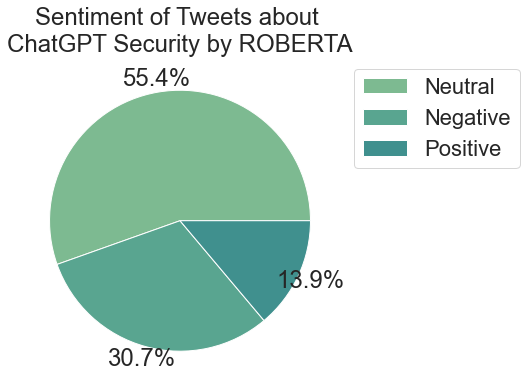

In [19]:
sns.set_palette('crest')
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.subplot(1,1,1)
pie_1 = df['ROBERTA_Sentiments'].value_counts()
plt.pie(pie_1, autopct="%.1f%%", pctdistance=1.1)
plt.legend(labels = pie_1.index, 
          bbox_to_anchor=[1,1])
plt.title('Sentiment of Tweets about \nChatGPT Security by ROBERTA')

In [21]:
# accuracy test
import pandas as pd
from sklearn.metrics import accuracy_score


df = pd.read_csv('Forty_chunks_new2.csv')
rd=pd.read_csv('Final_semtiment_document(2).csv')



actual_labels = df['Sentiment Labels'].tolist()
roberta_labels = df['ROBERTA_new_sentiment'].tolist()


accuracy = accuracy_score(actual_labels, roberta_labels)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [29]:
import pandas as pd
df=pd.read_csv('Forty_chunks_new2.csv')

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=2.0, style='whitegrid', color_codes=True)


In [31]:
df['ROBERTA_Sentiments'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score >= 0.25 else 'Negative' if score <-0.25else 'Neutral')

Text(0.5, 1.0, 'Sentiment of Tweets about \nChatGPT Security by ROBERTA')

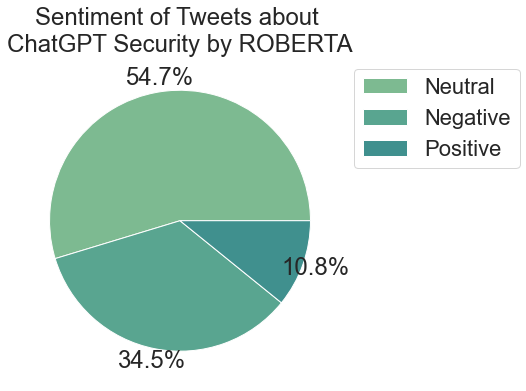

In [32]:
sns.set_palette('crest')
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.subplot(1,1,1)
pie_1 = df['ROBERTA_Sentiments'].value_counts()
plt.pie(pie_1, autopct="%.1f%%", pctdistance=1.1)
plt.legend(labels = pie_1.index, 
          bbox_to_anchor=[1,1])
plt.title('Sentiment of Tweets about \nChatGPT Security by ROBERTA')

In [48]:
import pandas as pd
df=pd.read_csv('Forty_chunks_new2.csv')

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=2.0, style='whitegrid', color_codes=True)


In [50]:
df['ROBERTA_Sentiments'] = df['ROBERTA_Polarity'].apply(lambda score: 'Positive' if score >= 0.19 else 'Negative' if score <-0.28else 'Neutral')

Text(0.5, 1.0, 'Sentiment of Tweets about \nChatGPT Security by ROBERTA')

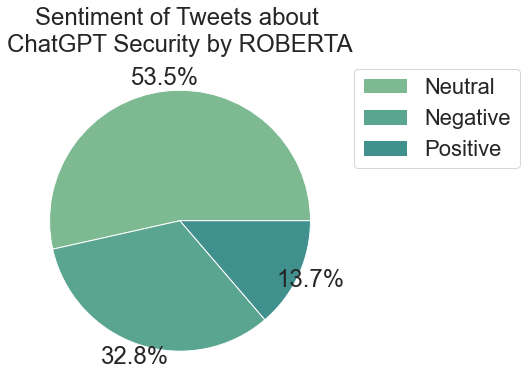

In [51]:
sns.set_palette('crest')
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.subplot(1,1,1)
pie_1 = df['ROBERTA_Sentiments'].value_counts()
plt.pie(pie_1, autopct="%.1f%%", pctdistance=1.1)
plt.legend(labels = pie_1.index, 
          bbox_to_anchor=[1,1])
plt.title('Sentiment of Tweets about \nChatGPT Security by ROBERTA')

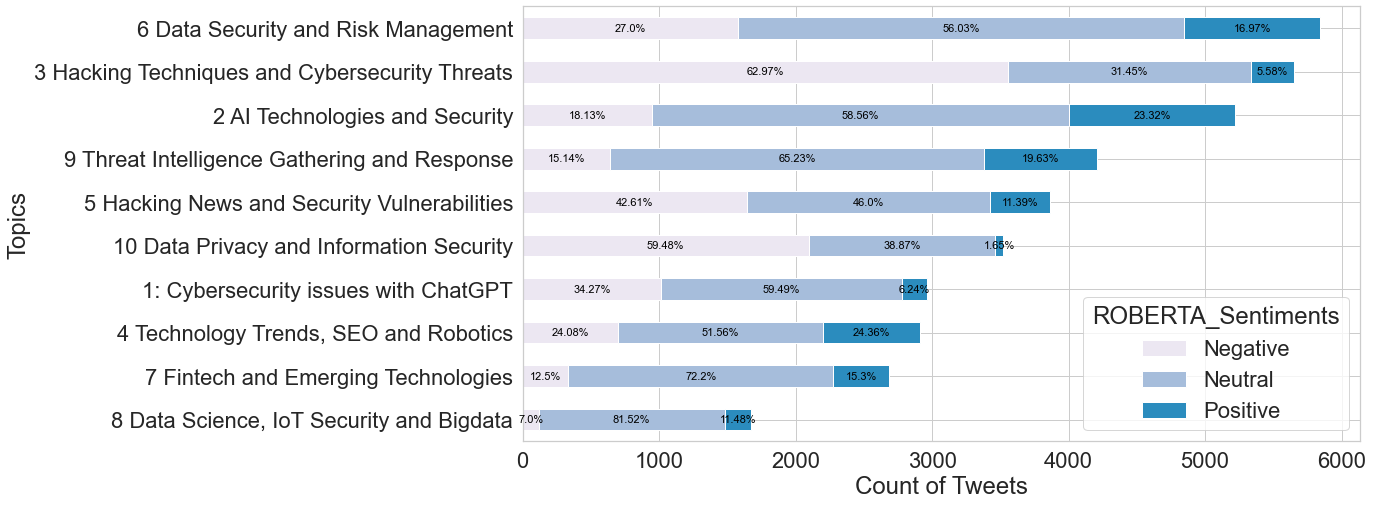

In [52]:
df=pd.read_csv('Forty_chunks_new2.csv')
topic_sen = df.groupby('Topic_Name')['ROBERTA_Sentiments'].value_counts().unstack().reset_index()

topic_sen['Total']=topic_sen['Negative']+topic_sen['Neutral']+topic_sen['Positive']
topic_sen = topic_sen.sort_values('Total')
topic_sen=topic_sen.drop(columns='Total')
topic_sen = topic_sen.set_index('Topic_Name')

ax=topic_sen.plot(kind='barh',stacked='True', color=['#ece7f2', '#a6bddb', '#2b8cbe'], figsize=(15,8))

percentages = topic_sen.div(topic_sen.sum(axis=1), axis=0)
percentages = percentages.reset_index().melt('Topic_Name', var_name='Sentiment', value_name='Percentage')

for i, patch in enumerate(ax.patches):
    ax.text(patch.get_x()+patch.get_width()/2, 
            patch.get_y()+0.25, 
            f'{round(percentages.loc[i,"Percentage"]*100,2)}%', 
            ha='center', va='center', 
            color='black', fontsize=11)
ax.set_xlabel('Count of Tweets')
ax.set_ylabel('Topics')
plt.show()